In [1]:
import pandas as pd
from pycaret.regression import *

# ## Weather Data Regression
# This script applies regression analysis on weather data collected from OpenWeatherMap for 17 Canadian cities.
# We will preprocess the data, combine different datasets, train a regression model to predict temperature, and analyze the results.

# ### 1. Load CSV files

In [4]:
real_time_df = pd.read_csv('C:\\Users\\biauser\\PycharmProjects\\PythonProject\\weather_data.csv', encoding='latin1')
historical_df = pd.read_csv('C:\\Users\\biauser\\PycharmProjects\\PythonProject\\historical_hourly_data.csv', encoding='latin1')
forecast_24h_df = pd.read_csv('C:\\Users\\biauser\\PycharmProjects\\PythonProject\\24_hour_forecast.csv', encoding='latin1')
forecast_14d_df = pd.read_csv('C:\\Users\\biauser\\PycharmProjects\\PythonProject\\14_day_forecast.csv', encoding='latin1')

# ### 2. Data Cleaning and Preprocessing

In [5]:
# Define common columns to standardize across datasets
common_columns = ['temperature_celsius', 'feels_like_celsius', 'humidity', 'pressure', 'wind_speed', 'datetime']

In [7]:
# Merge datasets
weather_df = pd.concat([real_time_df, historical_df, forecast_24h_df, forecast_14d_df], ignore_index=True)

In [8]:
# Select relevant features for regression
columns_to_keep = ['temperature_celsius', 'feels_like_celsius', 'humidity', 'pressure', 'wind_speed']
weather_df = weather_df[columns_to_keep].dropna()

# ### 3. Initialize PyCaret Regression Experiment

In [10]:
s = RegressionExperiment()
s.setup(data=weather_df, target='temperature_celsius', session_id=123)

,Description,Value
0,Session id,123
1,Target,temperature_celsius
2,Target type,Regression
3,Original data shape,"(1023, 5)"
4,Transformed data shape,"(1023, 5)"
5,Transformed train set shape,"(716, 5)"
6,Transformed test set shape,"(307, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


# ### 4. Model Selection

In [11]:
# Compare models and select the best one
best_model = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2706,0.2532,0.4847,0.9935,0.1102,0.2206,0.1530
gbr,Gradient Boosting Regressor,0.3352,0.2831,0.5216,0.9925,0.1275,0.2832,0.1170
rf,Random Forest Regressor,0.3312,0.3208,0.5468,0.9917,0.1228,0.2459,0.2120
lightgbm,Light Gradient Boosting Machine,0.4291,0.5766,0.7235,0.9857,0.1312,0.3168,0.1630
ridge,Ridge Regression,0.5443,0.6219,0.7766,0.9833,0.1896,0.6570,0.0210
lar,Least Angle Regression,0.5443,0.6220,0.7766,0.9833,0.1896,0.6569,0.0190
br,Bayesian Ridge,0.5442,0.6220,0.7766,0.9833,0.1896,0.6573,0.0170
lr,Linear Regression,0.5443,0.6220,0.7766,0.9833,0.1896,0.6569,1.1590
dt,Decision Tree Regressor,0.4913,0.6592,0.7972,0.9825,0.1743,0.3280,0.0200
huber,Huber Regressor,0.5081,0.6700,0.8034,0.9820,0.1817,0.4677,0.0290


# ### 5. Model Evaluation

In [12]:
s.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Visualizations:**

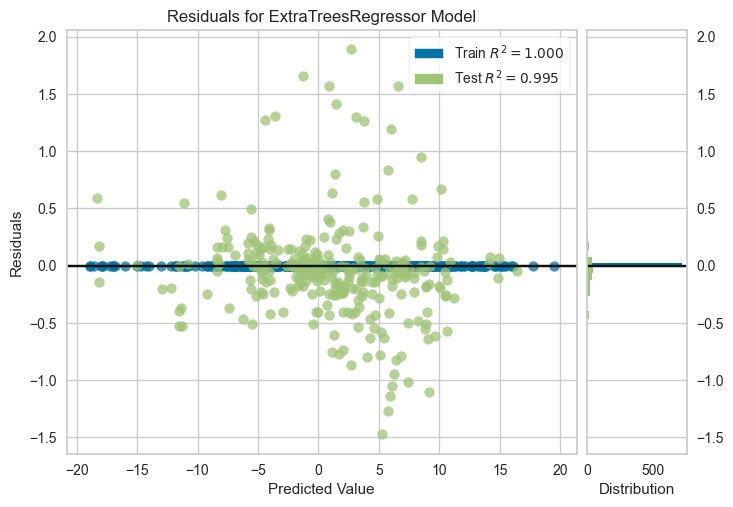

In [13]:
# - Residuals plot
s.plot_model(best_model)

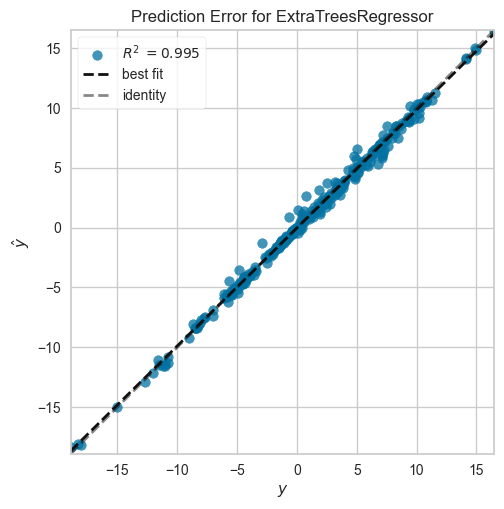

In [14]:
# - Prediction error plot
s.plot_model(best_model, plot='error')

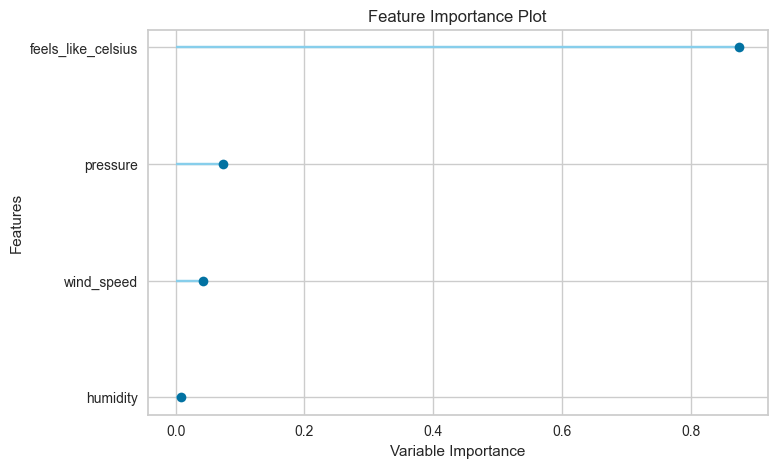

In [15]:
# - Feature importance plot
s.plot_model(best_model, plot='feature')

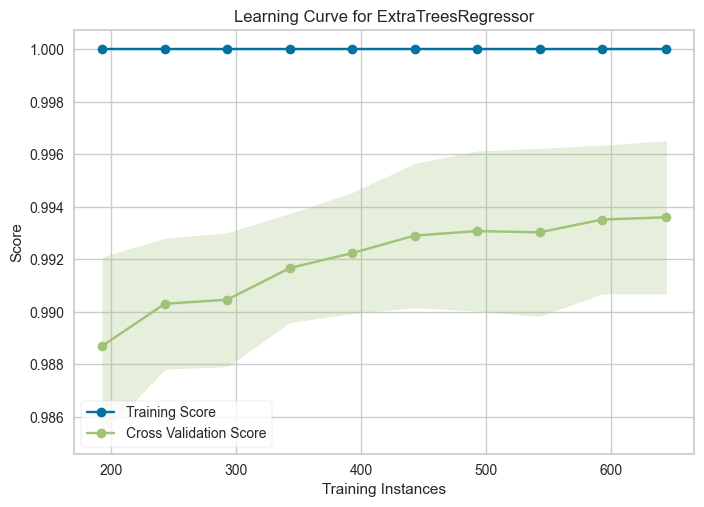

In [17]:
# - Learning curve
s.plot_model(best_model, plot='learning')

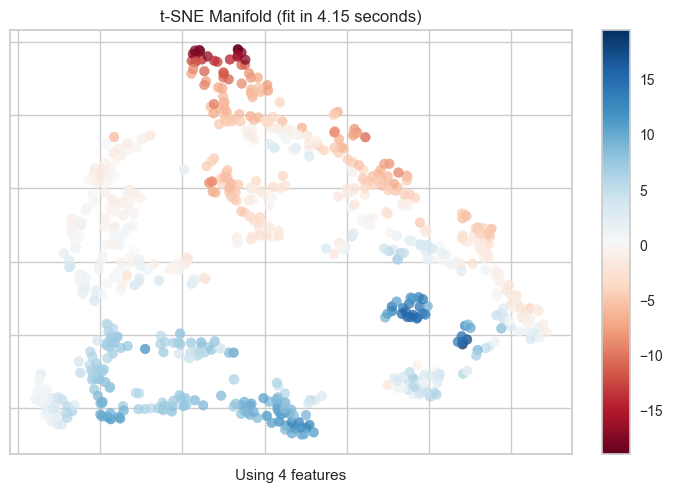

In [18]:
# - Manifold learning plot
s.plot_model(best_model, plot='manifold')

# ### 6. Model Tuning

In [19]:
# Tune the selected model
tuned_model = s.tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7310,1.0010,1.0005,0.9730,0.2434,1.4765
1,0.6683,0.9695,0.9846,0.9743,0.2284,1.1331
2,0.8204,1.3391,1.1572,0.9642,0.2483,0.3894
3,0.7117,0.7502,0.8661,0.9770,0.2357,0.4180
4,0.6643,0.8763,0.9361,0.9716,0.1996,0.4654
5,0.9204,2.0487,1.4313,0.9599,0.2503,0.2924
6,0.9091,1.2937,1.1374,0.9685,0.2749,0.9170
7,0.7237,0.8805,0.9383,0.9723,0.2456,0.4396
8,0.7623,1.1151,1.0560,0.9644,0.2383,1.2396


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [20]:
# Available plots
available_plots = s._available_plots
print(available_plots)


{'pipeline': 'Pipeline Plot', 'parameter': 'Hyperparameters', 'residuals': 'Residuals', 'error': 'Prediction Error', 'cooks': 'Cooks Distance', 'rfe': 'Feature Selection', 'learning': 'Learning Curve', 'manifold': 'Manifold Learning', 'vc': 'Validation Curve', 'feature': 'Feature Importance', 'feature_all': 'Feature Importance (All)', 'tree': 'Decision Tree', 'residuals_interactive': 'Interactive Residuals'}


# **Evaluate the tuned model:**

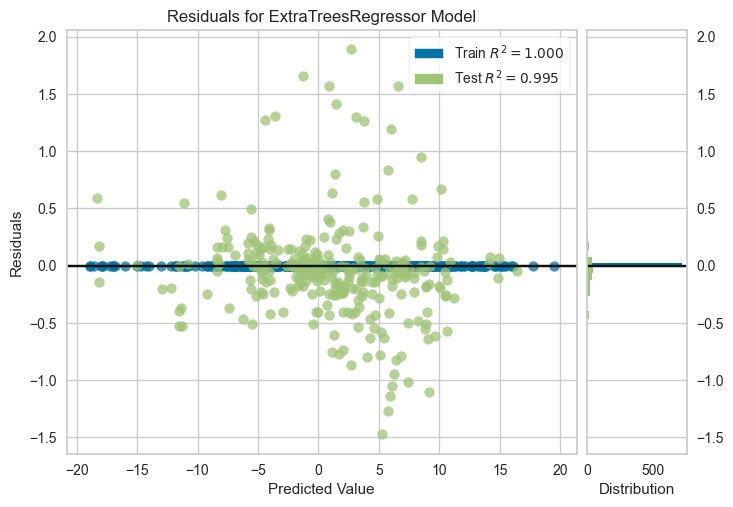

In [21]:
# - Residuals plot
s.plot_model(tuned_model)

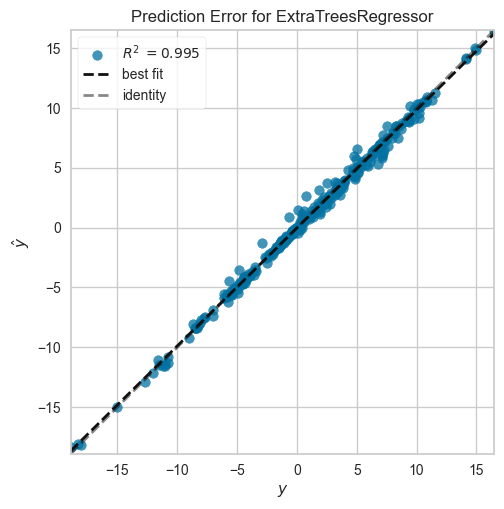

In [22]:
# - Prediction error plot
s.plot_model(tuned_model, plot='error')

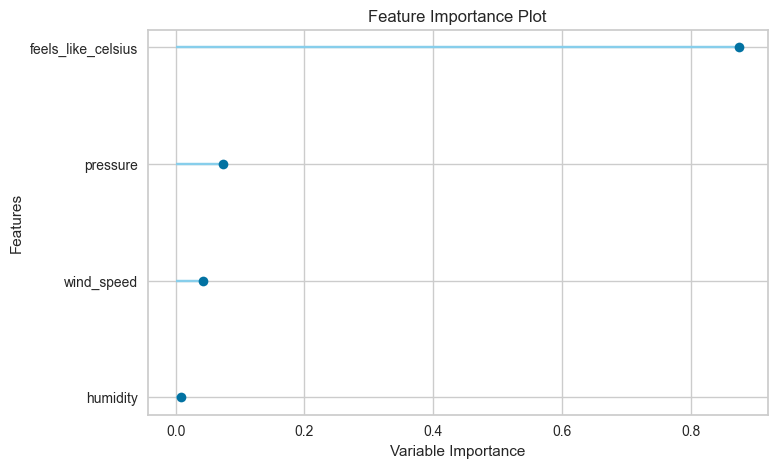

In [23]:
# - Feature importance plot
s.plot_model(tuned_model, plot='feature')

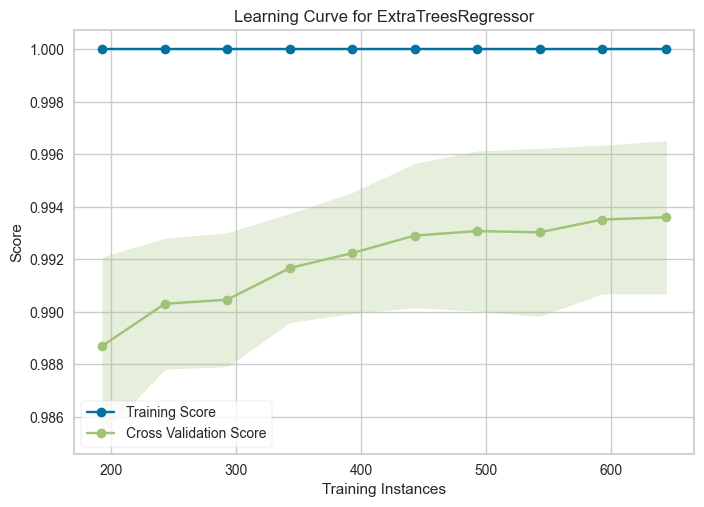

In [24]:
# - Learning curve
s.plot_model(tuned_model, plot='learning')

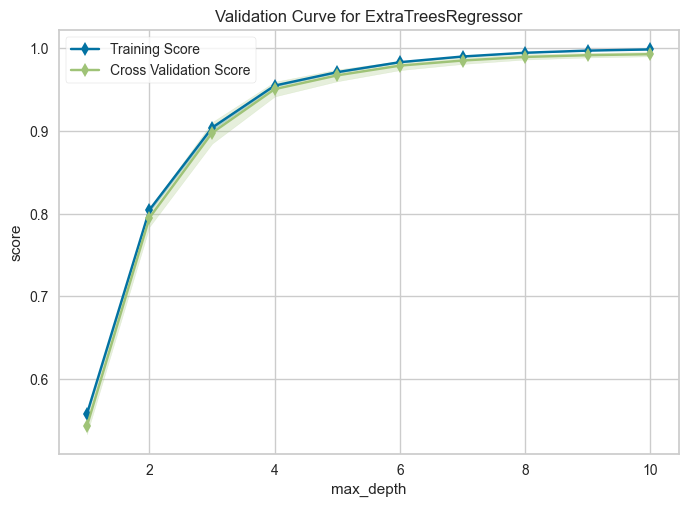

In [25]:
# - Validation curve
s.plot_model(tuned_model, plot='vc')

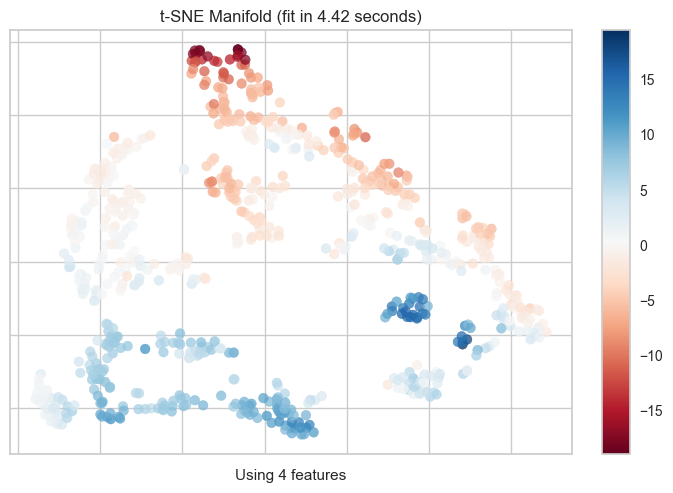

In [26]:
# - Manifold learning plot
s.plot_model(tuned_model, plot='manifold')

# ### 7. Predictions and Model Insights

In [27]:
# Predict on test data
predictions = s.predict_model(tuned_model)
print(predictions.head())


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.2645,0.1780,0.4219,0.9949,0.1129,0.2688


     feels_like_celsius  humidity  pressure  wind_speed  temperature_celsius  \
556            9.770000        72      1000        6.09                10.76   
621           -6.650000        96      1010        6.03                -0.93   
708            2.730000        99      1009        7.91                 6.95   
478          -16.190001        99      1027        2.57               -11.03   
944            2.210000        96      1016        3.99                 5.01   

     prediction_label  
556           10.6360  
621           -1.0038  
708            6.9006  
478          -11.5580  
944            5.0580  


In [28]:
# Print tuned model parameters
print(tuned_model.get_params())

{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}


# ### 8. Model Performance Summary

In [29]:
performance = s.pull()
print(performance)


                   Model     MAE    MSE    RMSE      R2   RMSLE    MAPE
0  Extra Trees Regressor  0.2645  0.178  0.4219  0.9949  0.1129  0.2688
